In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Rice",
    shuffle="True",
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2094 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Rice___Brown_Spot', 'Rice___Healthy', 'Rice___Leaf_Blast']

(32, 256, 256, 3)
[2 1 2 1 1 1 2 1 2 2 0 2 1 2 0 1 1 1 2 0 1 2 2 2 2 1 1 1 2 1 2 0]


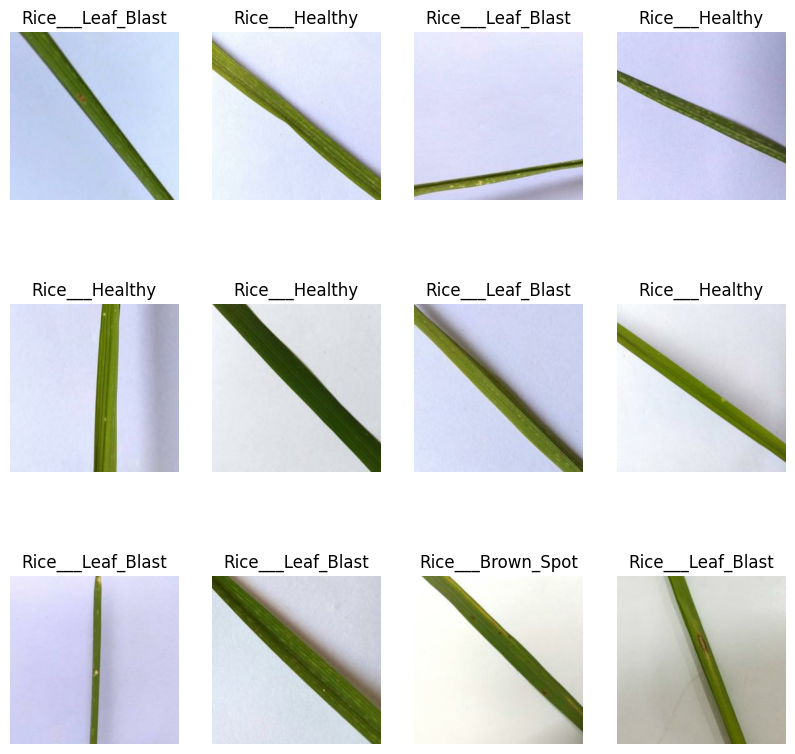

In [5]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
    
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [6]:
# 80% ==> Training
# 20% => test
#      10% => Validation
#      10% => Test

In [7]:

train_size=0.8
len(dataset)*train_size

52.800000000000004

In [8]:
train_ds=dataset.take(52)
len(train_ds)

52

In [9]:
test_ds=dataset.take(52)
len(test_ds)

52

In [10]:
val_size=0.1
len(dataset)*val_size

6.6000000000000005

In [11]:
val_size=0.1
len(dataset)*val_size

6.6000000000000005

In [12]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds=test_ds.skip(6)
len(test_ds)

46

In [14]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
        assert (train_split+test_split+val_split)==1
        ds_size=len(ds)
        if shuffle:
            ds=ds.shuffle(shuffle_size,seed=12)
            
        train_size=int(train_split*ds_size)
        val_size=int(val_split*ds_size)
        
        train_ds=ds.take(train_size)
        val_ds=ds.skip(train_size).take(val_size)
        test_ds=ds.skip(train_size).skip(val_size)
        
        return train_ds,val_ds,test_ds
    

In [15]:
len(train_ds)

52

In [16]:
len(test_ds)

46

In [17]:
len(val_ds)

6

In [18]:
52*32

1664

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy().shape)

(256, 256, 3)


In [21]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[218. 214. 211.]
  [217. 213. 210.]
  [217. 213. 210.]
  ...
  [224. 220. 217.]
  [224. 220. 217.]
  [223. 219. 216.]]

 [[219. 215. 212.]
  [218. 214. 211.]
  [218. 214. 211.]
  ...
  [224. 220. 217.]
  [223. 219. 216.]
  [223. 219. 216.]]

 [[220. 216. 213.]
  [220. 216. 213.]
  [219. 215. 212.]
  ...
  [224. 220. 217.]
  [223. 219. 216.]
  [223. 219. 216.]]

 ...

 [[228. 224. 221.]
  [227. 223. 220.]
  [226. 222. 219.]
  ...
  [229. 225. 222.]
  [229. 225. 222.]
  [229. 225. 222.]]

 [[228. 224. 221.]
  [227. 223. 220.]
  [226. 222. 219.]
  ...
  [230. 226. 223.]
  [230. 226. 223.]
  [230. 226. 223.]]

 [[229. 225. 222.]
  [227. 223. 220.]
  [226. 222. 219.]
  ...
  [230. 226. 223.]
  [230. 226. 223.]
  [230. 226. 223.]]]


In [22]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.9411765  0.9490196  0.99607843]
  [0.93333334 0.9411765  0.9882353 ]
  [0.92156863 0.92941177 0.9764706 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.9372549  0.94509804 0.99215686]
  [0.92941177 0.9372549  0.9843137 ]
  [0.92156863 0.92941177 0.9764706 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.9372549  0.94509804 0.99215686]
  [0.92941177 0.9372549  0.9843137 ]
  [0.9254902  0.93333334 0.98039216]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.9372549  0.9490196  0.9843137 ]
  [0.9372549  0.9490196  0.9843137 ]
  [0.9372549  0.9490196  0.9843137 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(0.1/255)
]
)

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [25]:
BATCH_SIZE

32

In [26]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model= models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])
model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
  )